In [1]:
import pandas as pd
import numpy as np
import vaex as vx
import matplotlib.pyplot as plt
import seaborn as sns
import time
from multiprocessing import Process
import gc

plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_colwidth", 9999)
vx.settings.display.max_columns = 200
vx.settings.display.max_rows = 100
vx.settings.max_colwidth=60000
pd.set_option('display.float_format',lambda x : '%.4f' % x)
np.set_printoptions(suppress=True) #
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

In [6]:
path = '../data/'
csv_name = 'tips.csv'

In [11]:
# !pwd
df = pd.read_csv(path+csv_name)
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.9900,1.0100,Female,No,Sun,Dinner,2
1,10.3400,1.6600,Male,No,Sun,Dinner,3


In [17]:
df.shape

(244, 7)

In [12]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [14]:
df.describe()

,total_bill,tip,size
count,244.0000,244.0000,244.0000
mean,19.7859,2.9983,2.5697
std,8.9024,1.3836,0.9511
min,3.0700,1.0000,1.0000
25%,13.3475,2.0000,2.0000
50%,17.7950,2.9000,2.0000
75%,24.1275,3.5625,3.0000
max,50.8100,10.0000,6.0000


In [15]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.0000,244.0000,244,244,244,244,244.0000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.7859,2.9983,NaN,NaN,NaN,NaN,2.5697
std,8.9024,1.3836,NaN,NaN,NaN,NaN,0.9511
min,3.0700,1.0000,NaN,NaN,NaN,NaN,1.0000
25%,13.3475,2.0000,NaN,NaN,NaN,NaN,2.0000
50%,17.7950,2.9000,NaN,NaN,NaN,NaN,2.0000
75%,24.1275,3.5625,NaN,NaN,NaN,NaN,3.0000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [18]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [19]:
df.total_bill.describe()

count   244.0000
mean     19.7859
std       8.9024
min       3.0700
25%      13.3475
50%      17.7950
75%      24.1275
max      50.8100
Name: total_bill, dtype: float64

In [22]:
df.tip.describe()

count   244.0000
mean      2.9983
std       1.3836
min       1.0000
25%       2.0000
50%       2.9000
75%       3.5625
max      10.0000
Name: tip, dtype: float64

In [23]:
df.sex.describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [28]:
df.smoker.describe()


count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

In [29]:
df.time.describe()

count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object

In [31]:
df['size'].describe()

count   244.0000
mean      2.5697
std       0.9511
min       1.0000
25%       2.0000
50%       2.0000
75%       3.0000
max       6.0000
Name: size, dtype: float64

In [34]:
# 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'
#df[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']].value_counts()

In [37]:
df[['sex']].value_counts()

sex   
Male      157
Female     87
Name: count, dtype: int64

In [38]:
df[['smoker']].value_counts()

smoker
No        151
Yes        93
Name: count, dtype: int64

In [39]:
df[['day']].value_counts()

day 
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [40]:
df[['time']].value_counts()

time  
Dinner    176
Lunch      68
Name: count, dtype: int64

In [41]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

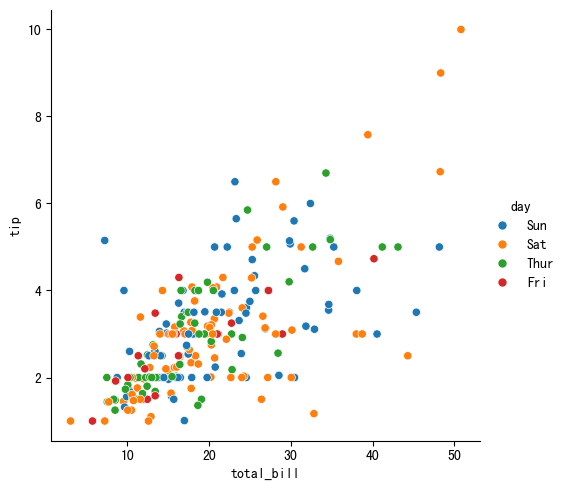

In [42]:
# 1.base relplot
sns.relplot(x='total_bill',y='tip',hue='day',data=df)
plt.show()

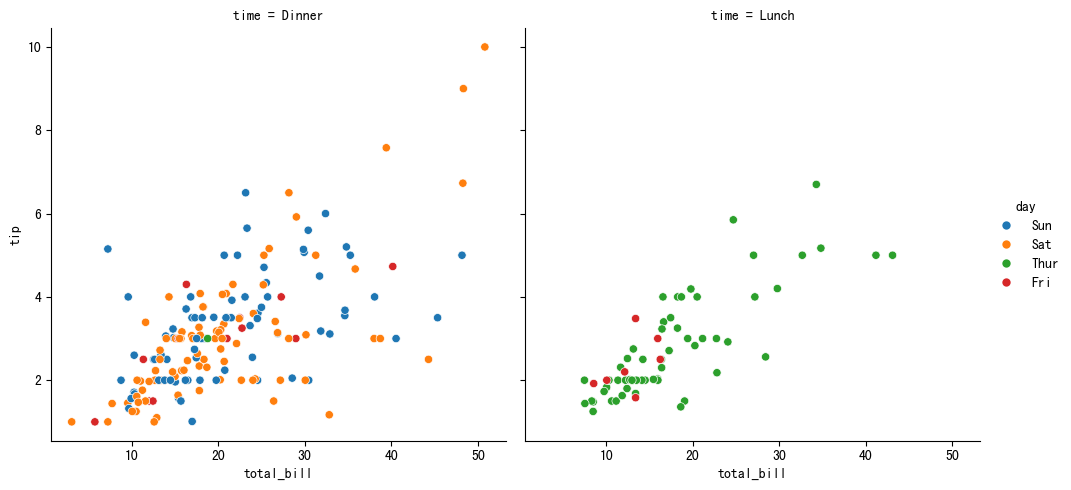

In [44]:
#2. set col=col_name
plt.close('all')
sns.relplot(x='total_bill',y='tip',hue='day',col='time',data=df)
plt.show()

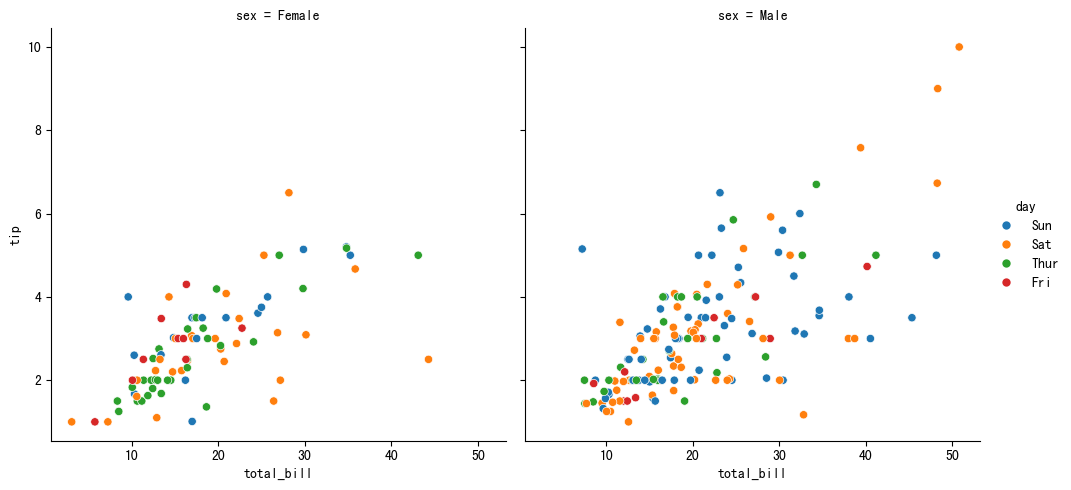

In [45]:
# 3 set col='sex'
plt.close('all')
sns.relplot(x='total_bill',y='tip',hue='day',col='sex',data=df)
plt.show()

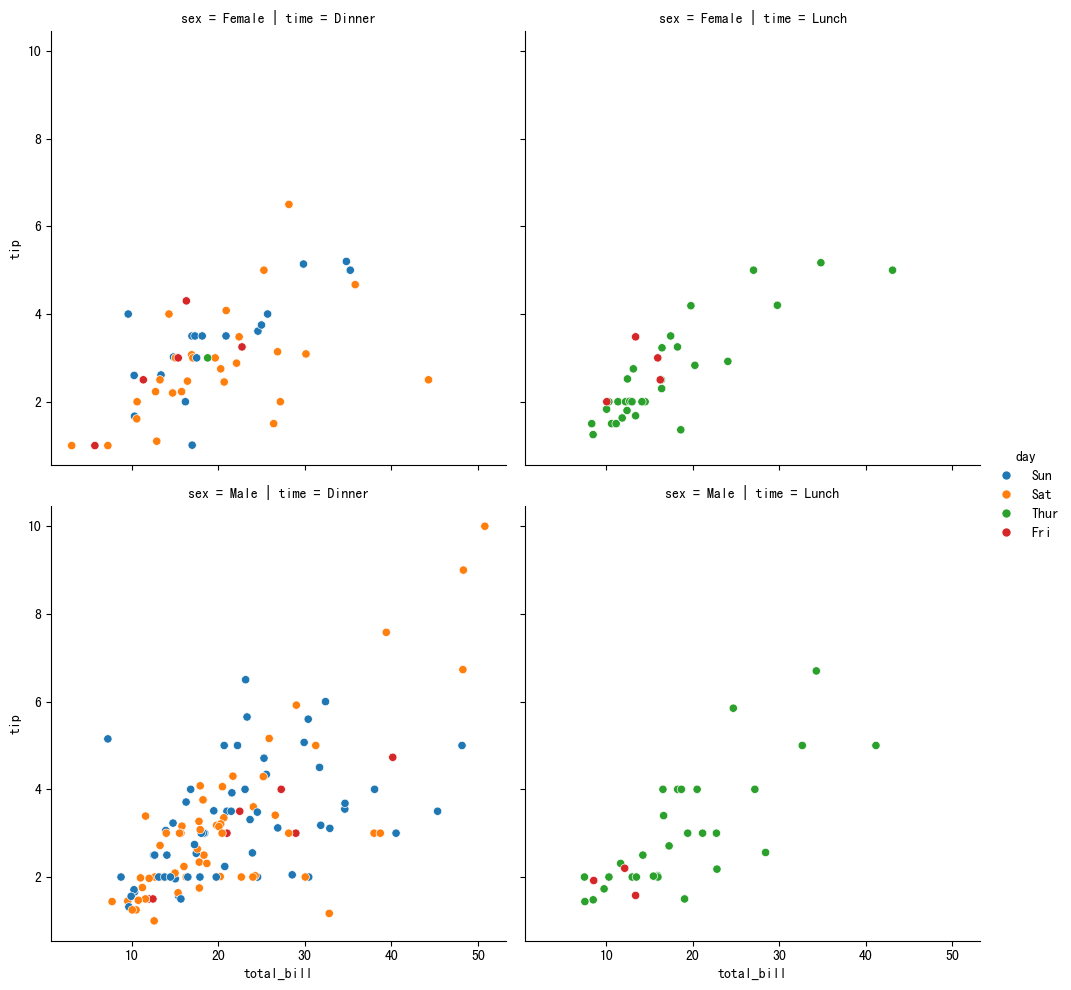

In [46]:
#4 set col='time',row='sex'
plt.close('all')
sns.relplot(x='total_bill',y='tip',hue='day',col='time',row='sex',data=df)
plt.show()

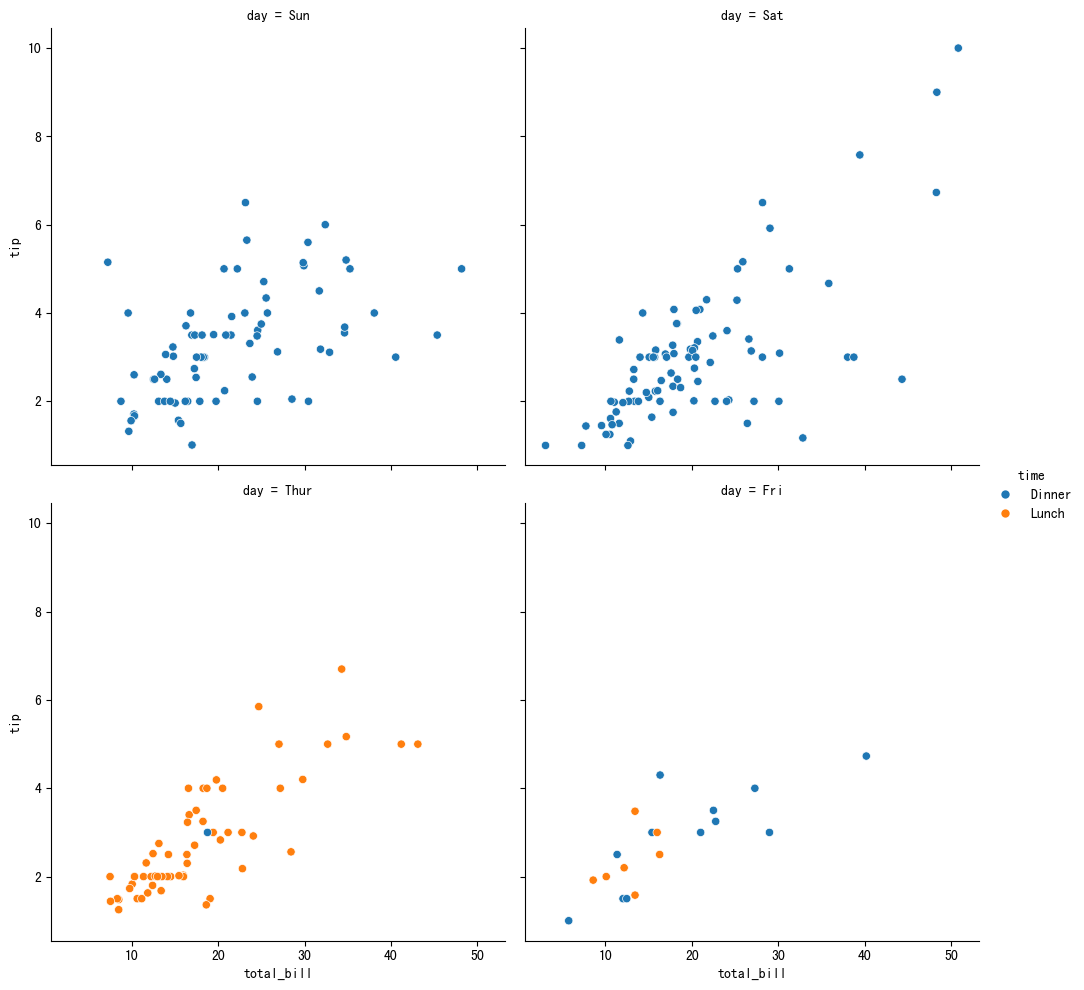

In [47]:
#5 set col='day',col_wrap=2 (tow rows)
plt.close('all')
sns.relplot(x='total_bill',y='tip',hue='time',col='day',col_wrap=2,data=df)
plt.show()
